# Wizualizacja danych w Pythonie

Graficzne przedstawianie danych i wyników analiz odgrywa kluczową rolę w takich dziedzinach jak statystyka, analiza danych, biznes czy nauki przyrodnicze i inżynierskie. Jest istotne zarówno na etapie eksploracji danych, jak i w procesie komunikowania odkrytych zależności innym odbiorcom. W tym opracowaniu zaprezentujemy różne rodzaje wykresów używanych do wizualizacji danych, ich implementację w wybranych bibliotekach języka Python, oraz praktyczne przykłady ich zastosowania. Wybrane biblioteki to:

- **matplotlib** - najpularniejsza biblioteka do wizualizacji danych z wykorzystaniem różnego rodzaju wykresów (liniowe, słuplowe, kołowe, histogramy, itd.).
- **plotly** - biblioteka do tworzenia interaktywnych wizualizacji w notatnikach Jupytera lub w aplikacjach internetowych opartych na Pythonie z użyciem Dasha. Pozwala na bezpośrednią eksplorację danych.
- **seaborn** - biblioteka, która sprawdza się przy tworzeniu wykresów statystycznych i dodaje estetyczną warstwę na bazie matplotlib. Jest zintegrowana z biblioteką pandas.

## 1. Matplotlib - podstawy wizualizacji z wykorzystaniem interfejsu pyplot

Matplotlib to kompleksowa biblioteka do tworzenia statycznych, interaktywnych i animowanych wizualizacji w Pythonie.  Jest niezwykle wszechstronna i może być używana zarówno do prostych wykresów, jak i skomplikowanych figur z wieloma podwykresami. W tej części omówimy podstawy wizualizacji z wykorzystaniem interfejsu matplotlib.pyplot. Zapewnia on domniemany (*implicit*) sposób tworzenia wykresów, podobny do tego znanego z MATLAB-a, gdzie operujemy na ostatnio utworzonym rysunku czy panelu. Każda funkcja pyplot zmienia rysunek, np. tworzy nowy rysunek, tworzy obszar rysowania, rysuje na nim linie i punkty, dodaje etykiety, itd. Jest on głównie przeznaczony do prostych przypadków generowania wykresów programistycznie.

W tym rozdziale przedstawimy podstawowe rodzaje wykresów dostępnych poprzez interfejs matplotlib.pyplot, ale osoby zainteresowane innymi rodzajmi wykresów oraz sposobami dodawania różnych elementów do generowanych rysunków odsyłamy do [dokumentacji](https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot).

Generalnie, funkcje graficzne matplotlib oczekują danych w postaci tablicy numpy.array lub obiektów, które można na nią przekształcić. Ramki danych pandas, czy nawet macierze numpy.matrix, mogą nie zawsze zadziałać w taki sposób jakiego oczekujemy, więc warto wcześniej przekształcić je na tablice numpy.

Aby zacząć, musisz zainstalować Matplotlib. Możesz to zrobić za pomocą pip:

In [1]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


Rozpocznijmy od wyświetlenia prostego **wykresu linowego**.

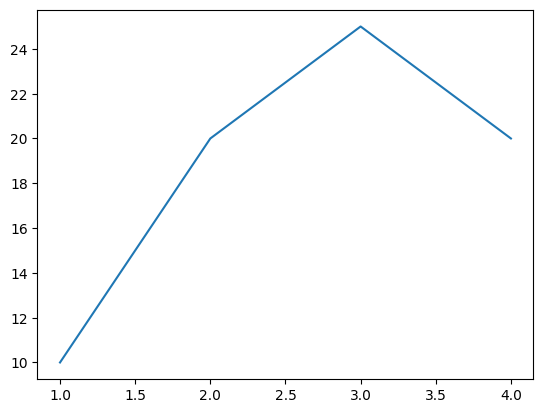

In [2]:
# Zaimportuj bibliotekę, a dokładje jej główny moduł pyplot
import matplotlib.pyplot as plt

# Przygotuj dane wejściowe
x = [1, 2, 3, 4]
y = [10, 20, 25, 20]

# Narysuj wykres liniowy
plt.plot(x, y) 
# Wyświetl wykres
plt.show() 
# Jupyter domyślnie woła show() na końcu każdej komórki, ale warto wywołać show() wprost

Tak jak oczekiwaliśmy został wyświetly wykres linowy przedstawiający nasze dane, ale brak na nim jakichkolwiek opisów osi czy tytułu. Uzupełnijmy zatem wykres o te elementy, a dodatkowo zmieńmy kolor, styl i grubość lini, a także dodajmy obserwacje.

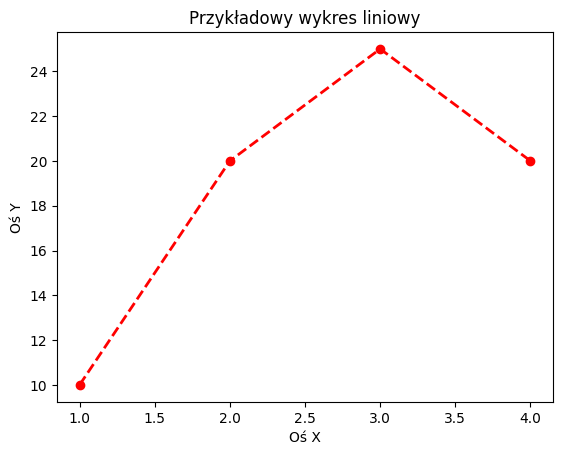

In [3]:
plt.plot(x, y, color='red', linestyle='dashed', linewidth=2, marker='o')
plt.xlabel('Oś X')
plt.ylabel('Oś Y')
plt.title('Przykładowy wykres liniowy')
plt.show()

W dalszej części przedstawimy inne rodzaje wykresów. Podzielimy jednak każdy rysunek (Figure) na panele lub osie (Axes), gdzie pokażemy podstawowe sposoby zmiany właściwości wykresu. 

Inne popularne rodzaje wykresów to:
- **wykres punktowy** (scatter plot)

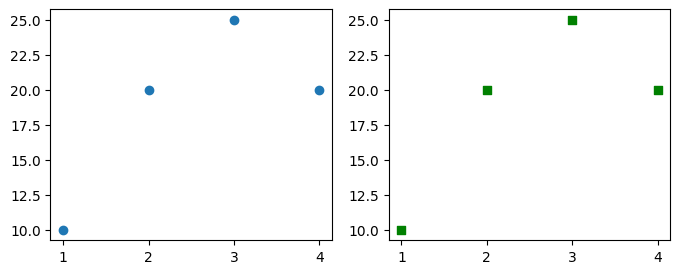

In [4]:
# Stwórz nowy wykres o określonym rozmiarze w calach
plt.figure(figsize=(8,3))

# Dodaj lewą oś (panel) przy podziale rysunku 1x2
plt.subplot(1, 2, 1) #nrows, ncols, index
# Narysuj wykres punktowy
plt.scatter(x, y)


# Dodaj prawą oś (panel) przy tym samym podziale rysunku 1x2
plt.subplot(1, 2, 2)
# Narysuj ten sam wykres w kolorze zielonym i punktami kwadratowymi  
plt.scatter(x, y, c='green', marker='s')

# Wyświetl wykres
plt.show()

- **wykres kołowy** (pie plot)

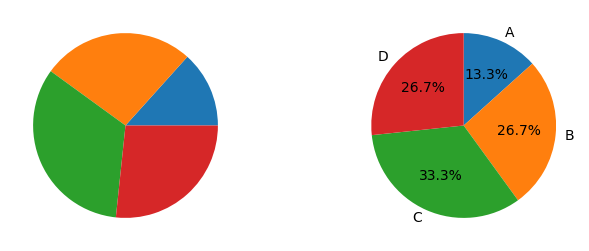

In [5]:
plt.figure(figsize=(8,3))

# Panel lewy
plt.subplot(1, 2, 1)
# Narysuj wykres kołowy
plt.pie(y)

# Panel prawy
plt.subplot(1, 2, 2)
# Narusyje ten sam wykres z etykietami i udziałem oraz zmianą kierunku i lokalizacji elementów wykresu
labels = ['A','B','C','D']
plt.pie(y, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False)

plt.show()

- **wykres słupkowy** (bar plot)

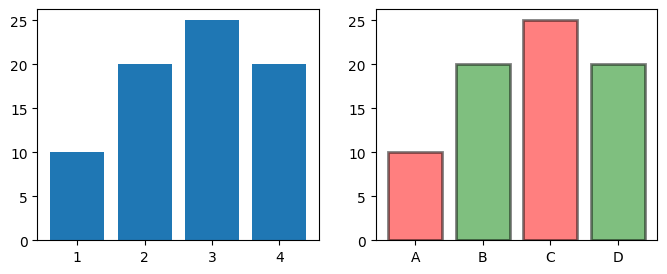

In [6]:
plt.figure(figsize=(8,3))

# Panel lewy
plt.subplot(1, 2, 1)
# Narysuj wykres słupkowy
plt.bar(x, y)

# Panel prawy
plt.subplot(1, 2, 2)
# Narysuj ten sam wykres dodając etykiety, zmieniając kolory i dodając grube krawędzie
plt.bar(x, y, tick_label=labels, color=['red','green'], edgecolor='black', alpha=0.5, linewidth=2)

plt.show()

- **histogram** (wykorzystywany do wizualizacji częstotliwości występowania wartości)

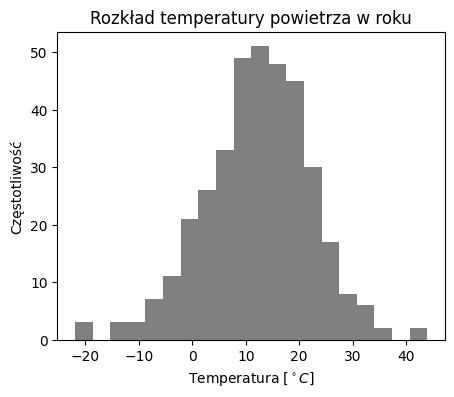

In [7]:
import numpy as np
np.random.seed(1024)

plt.figure(figsize=(5,4))

# Wygeneruj losowe dane z rozkładu normalnego
temp = np.random.normal(12, 10, 365)

plt.hist(temp, bins=20, color='gray')
plt.xlabel(r'Temperatura [$^\circ C$]')
plt.ylabel('Częstotliwość')
plt.title('Rozkład temperatury powietrza w roku')
plt.show()

Znając podstawowe rodzaje wykresów narysujmy teraz bardziej złożone wykresy.

**Przykład 1.1**: Grupowany wykres słupkowy

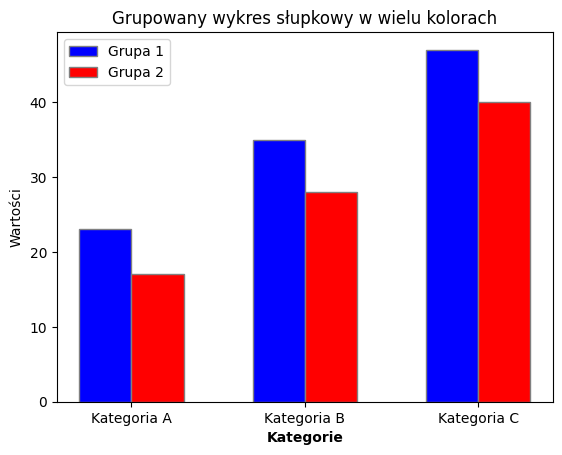

In [8]:
# Przykładowe dane
kategorie = ['Kategoria A', 'Kategoria B', 'Kategoria C']
grupa1 = [23, 35, 47]
grupa2 = [17, 28, 40]

# Zdefiniuj szerokość słupka
szerokoscSłupka = 0.3

# Ustaw pozycję słupka na osi X
r1 = np.arange(len(grupa1))
r2 = [x + szerokoscSłupka for x in r1]

# Narysuj słupki dla obu grup
plt.bar(r1, grupa1, color='blue', width=szerokoscSłupka, edgecolor='grey', label='Grupa 1')
plt.bar(r2, grupa2, color='red', width=szerokoscSłupka, edgecolor='grey', label='Grupa 2')

# Dodaj etykiety, tytuł i legendę
plt.xlabel('Kategorie', fontweight='bold')
plt.xticks([r + 0.5*szerokoscSłupka for r in range(len(grupa1))], kategorie)
plt.ylabel('Wartości')
plt.title('Grupowany wykres słupkowy w wielu kolorach')
plt.legend()

plt.show()

**Przykład 1.2**: Wykres punktowy wraz regresją liniową oraz przekazywanie argumentów przez nazwę

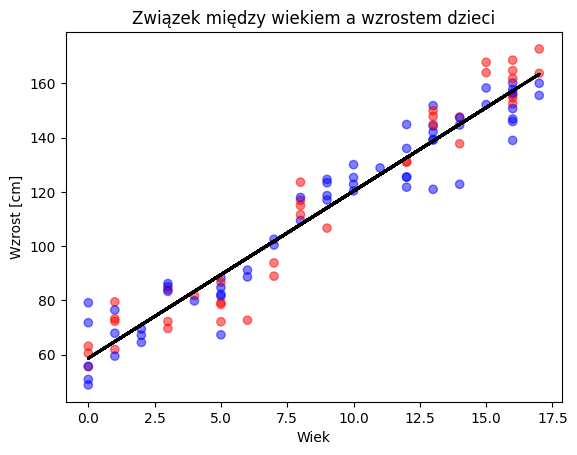

In [9]:
# Przykładowe dane
np.random.seed(1024)
dane = {'wiek': np.random.randint(0,18,100),
        'col': np.random.choice(['r','b'], size=100)}
dane['wzrost'] = np.random.normal(10,8,100) + dane['wiek'] * 6 + 50
# Narysuj wykres punktowy
plt.scatter('wiek', 'wzrost', color='col', marker='o', alpha=0.5, data=dane)
plt.xlabel('Wiek')
plt.ylabel('Wzrost [cm]')
plt.title('Związek między wiekiem a wzrostem dzieci')
# Dopasowanie funkcji wielomianowej (liniowej) metodą najmniejszych kwadratów (regresja liniowa)
m, b = np.polyfit(dane['wiek'], dane['wzrost'], 1)
plt.plot('wiek', m * dane['wiek'] + b, color='black', linestyle='-.', linewidth=2, data=dane)
plt.show()

## 2. Matplotlib - obiektowy interfejs "Axes"

Poza podstawowym stylem używania biblioteki matplotlib przedstawionym wyżej, istnieje też styl obiektowy służący do tworzenia bardziej rozbudowanych wykresów oraz bezpośredniego operowania na poszczególnych elementach wykresu. Tu może warto wyjaśnić podstawowe pojęcia Figure i Axes. Figure to obiekt reprezentujący całkowitą powierzchnięc rysowania (może mieć wiele wykresów) oraz pojemnik zawierający wszystkie elementy rysunku. W jego obrębie są umieszczane właściwe wykresy reprezentowane przez obiekty klasy Axes (osie, panele). Każdy taki obiekt posiada informacje o pojedynczym wykresie: system współrzędnych, osie, etykiety, tytuł, jak i inne elementy wykresu. Poniżej przedstawiamy elementy rysunku w matplotlib (źródło: [https://matplotlib.org/](https://matplotlib.org/)), gdzie do każdego elementu rysunku odwołujemy się bezpośrednio:

<center>
<div>
<img src="img/figure_anatomy.png" width="500">
</div>
</center>


Pyplot jest bardziej zwięzły, ale mniej elastyczny niż Axes. Jednak większośc funkcji pyplot ma swoje odpowiedniki w [matplotlib.axes.Axes](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html), gdyż zwykle są one jedynie funkcjami opakowującymi. Przykładowo, odpowiednikiem pierwszego wykresu w tym notatniku używającym bezpośredniego odwołania do obiektu klasy Axes jest:

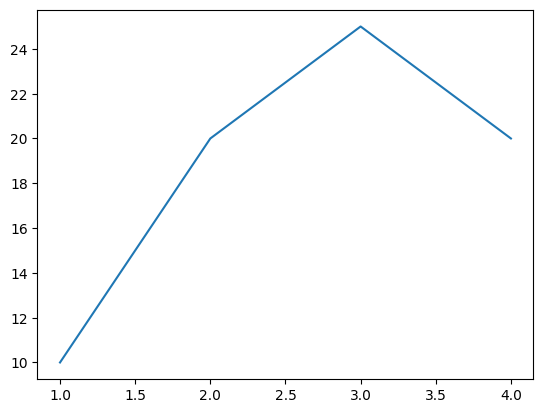

In [10]:
# Dodaj obiekt klasy Axes (właściwy wykres) do aktualnego rysunku
fig, ax = plt.subplots()
# Narysuje wykres liniowy na osi ax
ax.plot(x, y)
# Wyświetl wykres
plt.show()

Teraz możemy jednak tworzyć również bardziej zaawansowane wykresy. Poniżej przedstawiamy twójwymiarowy **wykres powierzchniowy** dla funkcji dwóch zmiennych (funkcja sinusoidalna). Tworzymy tu obiekt odpowiedniej podklasy klasy Axes (*projection*), która jest odpowiedzialna za realizację wykresów 3D, t.j. klasy mpl_toolkits.mplot3d.axes3d.Axes3D. Więcej rodzajów wykresów 3D można znaleźć w [dokumentacji](https://matplotlib.org/stable/api/toolkits/mplot3d/axes3d.html).

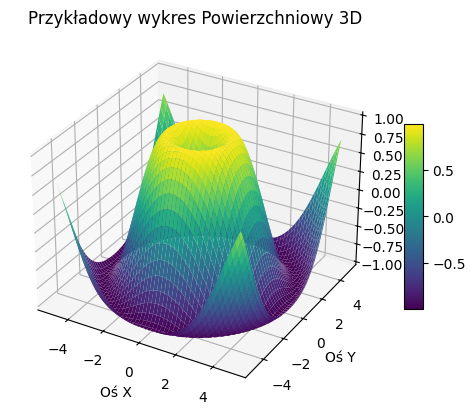

In [11]:
# Stwórz rysunek (Figure) i oś (obiekt podklasy klasy Axes) - właściwy wykres 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Przygotuj dane wejściowe
x_3d = np.linspace(-5, 5, 100)
y_3d = np.linspace(-5, 5, 100)
x_3d, y_3d = np.meshgrid(x_3d, y_3d)
z_3d = np.sin(np.sqrt(x_3d**2 + y_3d**2))

# Narysuj wykres powierzchniowy (używając mapy kolorów: viridis)
surf = ax.plot_surface(x_3d, y_3d, z_3d, cmap='viridis')

# Dodaj etykiety i tytuł
ax.set_xlabel('Oś X')
ax.set_ylabel('Oś Y')
ax.set_title('Przykładowy wykres Powierzchniowy 3D')

# Dodaj legendę (pasek kolorów), zmnijesz dwukrotnie, 
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()


Biblioteka matplotlib umożliwia również na tworzenie wykresów w innych układach współrzędnych poprzez odpowiednie rzutowania (projection) zdefiniowane jako podklasy klasy Axes.

## 3. Plotly - wykresy interaktywne

[Plotly](https://plotly.com/) jest biblioteką do tworzenia interaktywnych wykresów i map dostępną dla różnych języków programowania (Python, R, Julia, Javascript, ggplo2, F#, MATLAB i Dash). Plotly można zainstalować za pomocą pip:

In [22]:
!pip install plotly
#pip install --upgrade nbformat # czasami może też być wymagana instlacja lub uaktualnienie biblioteki nbformat

Defaulting to user installation because normal site-packages is not writeable


W plotly można tworzyć zarówno proste wykresy takie jak wykres liniowym, punktowy, słupkowy, itd, jaki i wykresy 3D, mapy i diagram, czy wykresy finansowe, bioinformatyczne, itd. Plotly posiada moduł [plotly.express](https://plotly.com/python/plotly-express/), który służy do tworzenia powszechnie używanych rodzajów wykresów w łatwy sposób. Domyśle wspiera on dane wejściowe w postacji pndas.DataFrame, ale inne typy danych takie jak tablice NumPy lub listy również są dopuszczalne. Nie będziemy tu omawiać dokładnie poszczególnych typów wykresów, ale podamy parę użytecznych przykładów.

**Przykład 3.1**: Wykres liniowy

In [23]:
import plotly.express as px
# Wczytaj dane gapminder
df = px.data.gapminder().query("continent == 'Europe'")
# Narysuj wykres liniowy, gdzie poszczególne kraje są oznaczone różnymi kolorami i znacznikami
fig = px.line(df, x='year', y='gdpPercap', color='country', symbol="country")
fig.show()

**Przykład 3.2**: Rozmiar populacji na mapie świata

In [14]:
df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df, locations="iso_alpha",
                     color="continent", # which column to use to set the color of markers
                     hover_name="country", # column added to hover information
                     size="pop", # size of markers
                     projection="natural earth")
fig.show()

**Przykład 3.3**: Wykres punktowy (bąbelkowy) z podziałem na kontynenty oraz animacja

In [15]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
fig.show()

Czasami plotly.express nie jest w stanie wygenerować wykresu, który chcemy ze względu na drobne szczegóły lub brak odpowiedniej funkcji. Wtedy możemy przejść do modułu *plotly.graph_objects* dostarczającego więcej rodzajów wykresów i sposobów ich dostosowania.

**Przykład 3.4**: Wykres liniowy w *plotly.graph_objects*

In [16]:
import plotly.graph_objects as go
import plotly.express as px

# Przykładowe dane
import numpy as np
np.random.seed(1)
random_x = np.linspace(0, 1, 100)
random_y = np.random.randn(100)

# Stwórz rysunek i kolejne jego elementy (wykresy liniowe przy użyciu go.Scatter) używając różnych stylów
fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=random_y-5, mode='lines', name='lines'))
fig.add_trace(go.Scatter(x=random_x, y=random_y  , mode='lines+markers', name='lines+markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y+5, mode='markers', name='markers'))
fig.show()

**Przykład 3.5**: Wykres powierzchniowy 3D w *plotly.graph_objects*

In [17]:
# Tworzenie wykresu powierzchniowego z wykorzystaniem poprzednich danych z wykresu 3d
fig = go.Figure(data=[go.Surface(z=z_3d, x=x_3d, y=y_3d)])
# Dostosowanie wyglądu
fig.update_layout(title='Wykres powierzchniowy', autosize=False,
                  width=600, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
# Wyświetlanie wykresu
fig.show()


## 4. Seaborn

[Seaborn](https://seaborn.pydata.org/) to biblioteka w Pythonie służąca do tworzenia estetycznych i informacyjnych wizualizacji danych w Pythonie. Jest zbudowana na podstawie matplotlib, co oznacza, że oferuje bardziej zaawansowane możliwości wizualizacji przy jednoczesnym uproszczeniu kodu potrzebnego do tworzenia wykresów. Seaborn jest zintegrowane z pandas.DataFrame, co pozwala na łatwe używanie danych z kolumn jako wejścia do wykresów. Wiele typów wykresów jest zoptymalizowanych pod kątem analizy statystycznej, takich jak regresje, rozkłady czy zależności między zmiennymi.

Seaborn można zainstalować za pomocą pip:

In [18]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


Ponownie, nie będziemy tu omawiać dokładnie poszczególnych typów wykresów, ale podamy parę użytecznych przykładów przedstawiających możliwości biblioteki.

**Przykład 4.1**: Wykres przedstawiający relacyjne zależności między zmiennymi

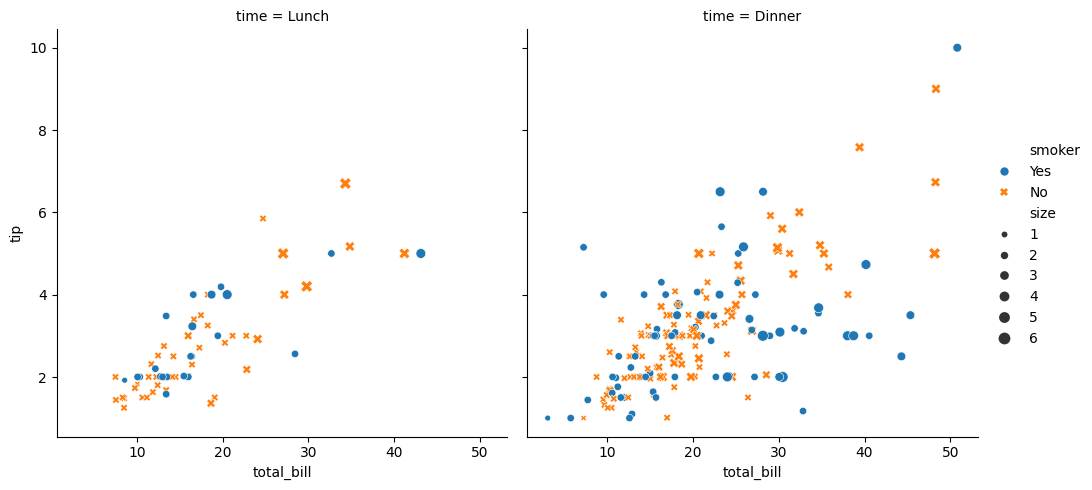

In [19]:
# Załaduj bibliotekę seaborn
import seaborn as sns
# Wczytaj zbiór danych tips
tips = sns.load_dataset("tips")

# Stwórz wykres relacyjny
sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker", style="smoker", size="size")
plt.show()

**Przykład 4.2**: Wykres przedstawiający zależności między danymi liczbowymi a danymi kategorycznymi

Parametr `kind` odpowiada za tym wykresu; możwliwe wartości to: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, lub “count”. Warto poeksperymentować i sprawdzić zachowanie funkcji catplot dla różnych wartości parametru kind.

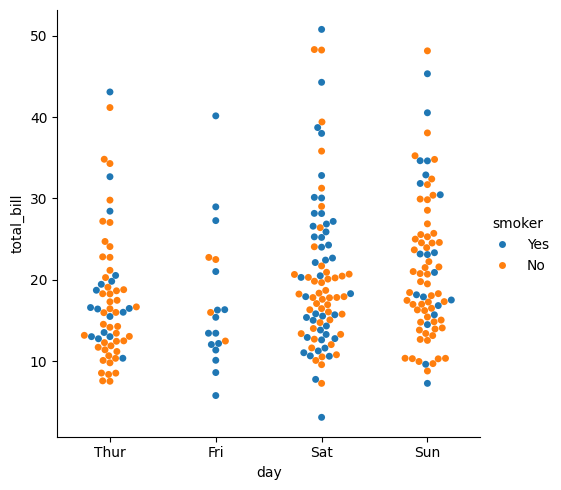

In [20]:

sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")
plt.show()